<a href="https://colab.research.google.com/github/Hyunggilwoo/CSE422/blob/main/422_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Default title text

import matplotlib.pyplot as plt
import numpy as np

# Using numpy linalog.multi_dot
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.multi_dot.html
def least_squares_regression():
  d = 150 # dimensions of data
  n = 1500 # number of data points
  X = np.random.normal(0,1, size=(n,d))
  a_true = np.random.normal(0,1, size=(d,1))
  y = X.dot(a_true) + np.random.normal(0,0.5,size=(n,1))

  # solving for a.
  square_matrix = np.matmul(X.transpose(), X)
  inverse_square_matrix = np.linalg.inv(square_matrix)
  a = np.linalg.multi_dot([inverse_square_matrix, X.transpose(), y])

  # compute residuals
  residuals = y - X.dot(a)
  # square the residuals
  squared_residuals = np.power(residuals, 2)
  # sum of the squared residuals
  objective_value = np.sum(squared_residuals)
  print(objective_value)

In [ ]:
least_squares_regression()

323.1958115867697


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def compare_average_error():
  d = 150 # dimensions of data
  n = 1500 # number of data points
  X = np.random.normal(0,1, size=(n,d))
  a_true = np.random.normal(0,1, size=(d,1))
  y = X.dot(a_true) + np.random.normal(0,0.5,size=(n,1))

  # solving for a.
  square_matrix = np.matmul(X.transpose(), X)
  inverse_square_matrix = np.linalg.inv(square_matrix)
  a = np.linalg.multi_dot([inverse_square_matrix, X.transpose(), y])

  # solve for n = 1500
  diff = X.dot(a_true) - X.dot(a)
  squared_diff = np.power(diff, 2)
  average_error = np.mean(squared_diff)

  print(average_error)

In [ ]:
compare_average_error()

0.024297934971464742


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

def plot_gradient_descent():
  # given data
  d = 150 # dimensions of data
  n = 1500 # number of data points
  X = np.random.normal(0,1, size=(n,d))
  a_true = np.random.normal(0,1, size=(d,1))
  y = X.dot(a_true) + np.random.normal(0,0.5,size=(n,1))

  # computing E(a)

  #initialize parameters
  a = np.zeros((d, 1))
  alpha_list = [0.00006, 0.0003, 0.00045, 0.0006, 0.00075, 0.001, 0.004]
  num_iterations = 20
  error_history =[]

  # gradient descent algorithm
  for alpha in alpha_list:
    a_temp = np.copy(a)
    error_temp = []

    for i in range(num_iterations):
      h = np.dot(X, a_temp)
      E = h - y
      gradient = (2 / n) * np.dot(X.T, E)
      a_temp = a_temp - alpha * gradient
      error_temp.append(np.mean(E ** 2))

    error_history.append(error_temp)

  # plot the error history for different learning rates
  plt.figure()

  for idx, alpha in enumerate(alpha_list):
    plt.plot(range(num_iterations), error_history[idx], label=f'alpha = {alpha}')
  plt.xlabel('Number of iterations')
  plt.ylabel('Mean squared error')
  plt.legend()
  plt.title('Gradient Descent Convergence')
  plt.show()

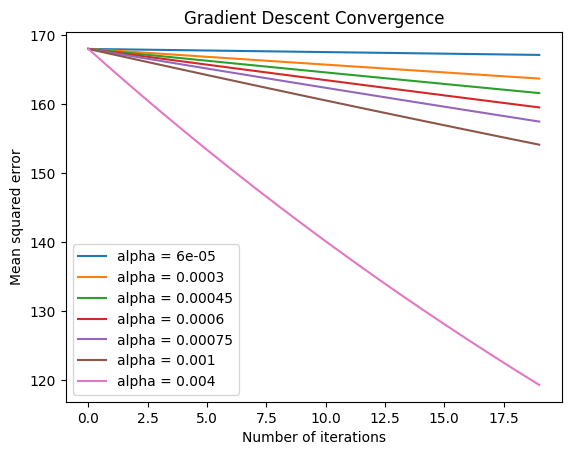

In [ ]:
plot_gradient_descent()

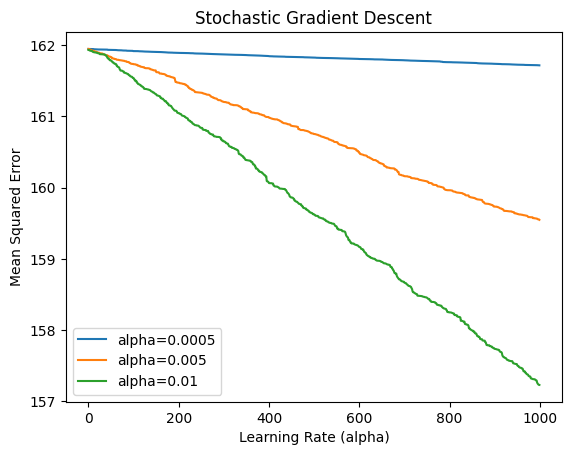

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def stochastic_gradient_descent(X, y, a, alpha, num_iterations):
    n, d = X.shape
    error_history = []

    for i in range(num_iterations):
        # Randomly choose a single training sample
        random_index = np.random.randint(0, n)
        X_i = X[random_index, :].reshape(1, -1)
        y_i = y[random_index].reshape(1, -1)

        # Calculate the gradient for the single training sample
        h = np.dot(X_i, a)
        E = h - y_i
        gradient = (2 / n) * np.dot(X_i.T, E)

        # Update the parameter vector
        a = a - alpha * gradient

        # calculate and store the error for the current data
        h_temp = np.dot(X, a)
        E_temp = h_temp - y
        error_temp = np.mean(E_temp ** 2)
        error_history.append(error_temp)

    return a, error_history

def plot_gradient_descent():
    # given data
    d = 150  # dimensions of data
    n = 1500  # number of data points
    X = np.random.normal(0, 1, size=(n, d))
    a_true = np.random.normal(0, 1, size=(d, 1))
    y = X.dot(a_true) + np.random.normal(0, 0.5, size=(n, 1))

    # initialize parameters
    a = np.zeros((d, 1))
    alpha_list = [0.0005,0.005,0.01]
    num_iterations = 1000
    error_history_all = []

    # stochastic gradient descent algorithm
    for alpha in alpha_list:
        a_temp = np.copy(a)
        a_temp, error_history = stochastic_gradient_descent(X, y, a_temp, alpha, num_iterations)
        error_history_all.append(error_history)

    for idx, alpha in enumerate(alpha_list):
      plt.plot(range(num_iterations), error_history_all[idx], label=f'alpha={alpha}')

    # Plot the results
    plt.xlabel('Learning Rate (alpha)')
    plt.ylabel('Mean Squared Error')
    plt.title('Stochastic Gradient Descent')
    plt.legend()
    plt.show()

plot_gradient_descent()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# this is necessary for the 2nd problem
def normalized_error():
  train_n = 150
  test_n = 1500
  d = 150
  X_train = np.random.normal(0,1, size=(train_n,d))
  a_true = np.random.normal(0,1, size=(d,1))
  y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
  X_test = np.random.normal(0,1, size=(test_n,d))
  y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

  # normalization without regularization
  a_train = np.matmul(X_train.T, y_train)
  a_test = np.matmul(X_test.T, y_test)

  # compute average over 10 trials
  train_errors = np.zeros((10, ))
  test_errors = np.zeros((10, ))
  for i in range(10):

    y_train_pred = X_train @ a_train
    y_test_pred = X_test @ a_test

    train_error = np.linalg.norm(y_train_pred - y_train)
    test_error = np.linalg.norm(y_test_pred - y_test)

    #normalize error
    y_train_norm = np.linalg.norm(y_train)
    y_test_norm = np.linalg.norm(y_test)

    normalized_train_error = train_error / y_train_norm
    normalized_test_error = test_error / y_test_norm

    train_errors[i] = normalized_train_error
    test_errors[i] = normalized_test_error

  print("normalized train error mean:", np.mean(train_errors))
  print("normalized test error mean:", np.mean(test_errors))

normalized_error()


normalized train error mean: 324.43480326859947
normalized test error mean: 1860.4596741730898


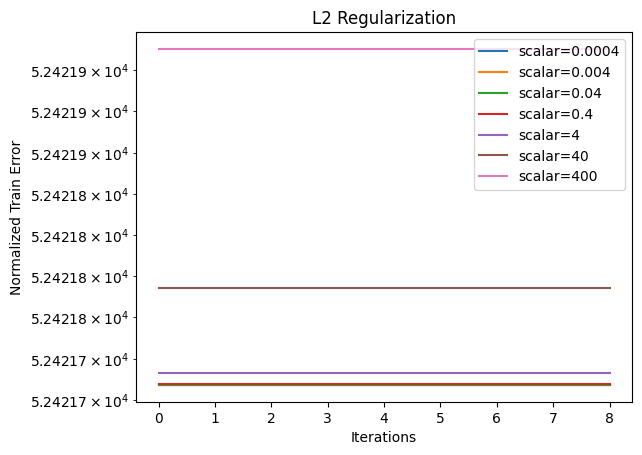

normalized train error mean: 47179.74408608424


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

# define the l2 regularization
# Present a plot of the normalized training and test error
def l2_regularization():

  # initial data
  train_n = 150
  test_n = 1500
  d = 150
  X_train = np.random.normal(0,1, size=(train_n,d))
  a_true = np.random.normal(0,1, size=(d,1))
  y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
  X_test = np.random.normal(0,1, size=(test_n,d))
  y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

  # initialize parameters
  a = np.zeros((d, 1))
  scalar_list = [0.0004, 0.004, 0.04, 0.4, 4, 40, 400]
  num_iterations = 10
  error_history_all = []

  # normalization
  I = np.identity(train_n) # possible for train

  # compute average over 10 trials
  train_errors = np.zeros((10, ))
  test_errors = np.zeros((10, ))



  # computing a_l2
  for scalar in scalar_list:

    # normalization
    train_regularized_gram_matrix = np.matmul(X_train.T, X_train) + scalar * I
    a_train_l2_inverse = np.power(train_regularized_gram_matrix, -1)

    a_train_l2 = np.linalg.multi_dot([a_train_l2_inverse, X_train.T, y_train])

    error_history = [] # initialize error history for each level

    # 0th index must be kept at 0 to reflect an accurate mean
    for i in range(1, num_iterations):

      y_train_pred = X_train @ a_train_l2

      train_error = np.linalg.norm(y_train_pred - y_train)

      #normalize error
      y_train_norm = np.linalg.norm(y_train)

      normalized_train_error = train_error / y_train_norm

      train_errors[i] = normalized_train_error

      error_history.append(normalized_train_error)

    error_history_all.append(error_history)

  for idx, scalar in enumerate(scalar_list):
    plt.plot(range(num_iterations - 1), error_history_all[idx], label=f'scalar={scalar}')

  # Plot the results
  plt.xlabel('Iterations')
  plt.ylabel('Normalized Train Error')
  plt.yscale("log")
  plt.title('L2 Regularization')
  plt.legend()
  plt.show()
  print("normalized train error mean:", np.mean(train_errors))

l2_regularization()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m


# initial data
train_n = 150
test_n = 1500
d = 150
X_train = np.random.normal(0,1, size=(train_n,d))
a_true = np.random.normal(0,1, size=(d,1))
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
X_test = np.random.normal(0,1, size=(test_n,d))
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

# define the l2 regularization
# Present a plot of the normalized training and test error
def run_sgd(alpha, num_iterations=1000000):
  a = np.zeros((d, 1))

  for _ in range(num_iterations):
      i = np.random.randint(0, train_n)
      x_i, y_i = X_train[i], y_train[i]
      grad = -2 * (y_i - x_i.dot(a)) * x_i.reshape(-1, 1)
      a -= alpha * grad

  return a


def normalized_error(a):
  y_train_pred = X_train @ a
  y_test_pred = X_test @ a

  train_error = np.linalg.norm(y_train_pred - y_train)
  test_error = np.linalg.norm(y_test_pred - y_test)

  y_train_norm = np.linalg.norm(y_train)
  y_test_norm = np.linalg.norm(y_test)

  normalized_train_error = train_error / y_train_norm
  normalized_test_error = test_error / y_test_norm

  return normalized_train_error, normalized_test_error

def plot_errors(train_errors_all, test_errors_all, alphas):
    for idx, alpha in enumerate(alphas):
        plt.plot(range(num_trials), train_errors_all[idx], label=f'alpha={alpha} (train)')
        plt.plot(range(num_trials), test_errors_all[idx], label=f'alpha={alpha} (test)', linestyle='--')

    plt.xlabel('Trial')
    plt.ylabel('Normalized Error')
    plt.title('SGD Normalized Train and Test Errors')
    plt.legend()
    plt.show()


  # initialize parameters
  a = np.zeros((d, 1))
  scalar_list = [0.00005,0.0005,0.005]
  num_iterations = 1000000
  num_trials = 10
  error_history_all = []

  # normalization without regularization
  a_train = np.matmul(X_train.T, y_train)
  a_test = np.matmul(X_test.T, y_test)

  # compute average over 10 trials
  train_errors = np.zeros((10, ))
  test_errors = np.zeros((10, ))

  for i in range(num_trials):

    y_train_pred = X_train @ a_train
    y_test_pred = X_test @ a_test

    train_error = np.linalg.norm(y_train_pred - y_train)
    test_error = np.linalg.norm(y_test_pred - y_test)

    #normalize error
    y_train_norm = np.linalg.norm(y_train)
    y_test_norm = np.linalg.norm(y_test)

    normalized_train_error = train_error / y_train_norm
    normalized_test_error = test_error / y_test_norm

    train_errors[i] = normalized_train_error
    test_errors[i] = normalized_test_error

  print("normalized train error mean:", np.mean(train_errors))
  print("normalized test error mean:", np.mean(test_errors))

IndentationError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

# initial data
train_n = 150
test_n = 1500
d = 150
X_train = np.random.normal(0,1, size=(train_n,d))
a_true = np.random.normal(0,1, size=(d,1))
y_train = X_train.dot(a_true) + np.random.normal(0,0.5,size=(train_n,1))
X_test = np.random.normal(0,1, size=(test_n,d))
y_test = X_test.dot(a_true) + np.random.normal(0,0.5,size=(test_n,1))

# Number of experiment iterations
num_iterations = 1000000
alphas = [0.00005, 0.0005, 0.005]

def run_sgd(X, y, a, alpha):
    """
    It takes some
    """
    n, d = X.shape
    error_history = []

    for i in range(num_iterations):
        # Randomly choose a single training sample
        random_index = np.random.randint(0, n)
        X_i = X[random_index, :].reshape(1, -1)
        y_i = y[random_index].reshape(1, -1)

        # Calculate the gradient for the single training sample
        h = np.dot(X_i, a)
        E = h - y_i
        gradient = (2 / n) * np.dot(X_i.T, E)

        # Update the parameter vector
        a = a - alpha * gradient

        # calculate and store the error for the current data
        h_temp = np.dot(X, a)
        E_temp = h_temp - y
        error_temp = np.mean(E_temp ** 2)
        error_history.append(error_temp)

    return a, error_history

def normalized_error(a):
    y_train_pred = X_train @ a
    y_test_pred = X_test @ a

    train_error = np.linalg.norm(y_train_pred - y_train)
    test_error = np.linalg.norm(y_test_pred - y_test)

    y_train_norm = np.linalg.norm(y_train)
    y_test_norm = np.linalg.norm(y_test)

    normalized_train_error = train_error / y_train_norm
    normalized_test_error = test_error / y_test_norm

    return normalized_train_error, normalized_test_error

def l2_regularization(scalar, num_iterations=1000000):
    I = np.identity(train_n)

    train_regularized_gram_matrix = np.matmul(X_train.T, X_train) + scalar * I
    a_train_l2_inverse = np.power(train_regularized_gram_matrix, -1)
    a_train_l2 = np.linalg.multi_dot([a_train_l2_inverse, X_train.T, y_train])

    train_errors = np.zeros((num_iterations, ))

    for i in range(1, num_iterations):
        y_train_pred = X_train @ a_train_l2
        train_error = np.linalg.norm(y_train_pred - y_train)
        y_train_norm = np.linalg.norm(y_train)
        normalized_train_error = train_error / y_train_norm

        train_errors[i] = normalized_train_error

    return train_errors

def main_experiment(alphas, num_trials=10):
  # Run the main experiment for SGD
  train_errors_all = []
  test_errors_all = []

  # Run L2 regularization experiment
  l2_train_errors_all = []

  for alpha in alphas:
    # initialize the array
      train_errors = np.zeros((num_trials, ))
      test_errors = np.zeros((num_trials, ))
      l2_train_errors = np.zeros((num_trials, ))

      for i in range(num_trials):
          # takes sgd stuff
          a = run_sgd(X_train, y_train, np.zeros((d, 1)), alpha)
          train_error, test_error = normalized_error(a)
          train_errors[i] = train_error
          test_errors[i] = test_error

          # run L2 regularization for the current alpha
          l2_train_error = l2_regularization(alpha, num_iterations)
          l2_train_errors[i] = np.mean(l2_train_errors)

      # run SGD
      train_errors_all.append(train_errors)
      test_errors_all.append(test_errors)
  # Call the plotting function
  plot_errors(train_errors_all, test_errors_all, l2_train_errors_all, alphas, scalars)


def plot_errors(train_errors_all, test_errors_all, l2_train_errors_all, alphas):
    for idx, alpha in enumerate(alphas):
        # plot SGD rain errors vs. test errors
        plt.plot(range(num_trials), train_errors_all[idx], label=f'SGD alpha={alpha} (train)')
        plt.plot(range(num_trials), test_errors_all[idx], label=f'SGD alpha={alpha} (test)', linestyle='--')

        # plot L2 normalized errors
        plt.plot(range(num_trials - 1), l2_train_errors_all[idx][1:], label=f'L2 alpha={alpha}', linestyle=':')

    plt.xlabel('Trial/Iteration')
    plt.ylabel('Normalized Error')
    plt.title('SGD and L2 Regularization Normalized Errors')
    plt.legend()
    plt.show()

# run the experiment with list of alpha and the number of iterations

main_experiment(alphas, 10)

<ipython-input-1-3e60c29004fd>:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_train_pred = X_train @ a


ValueError: ignored